# Create synthetic data from wine dataset

In [13]:
!pip install s3fs
!pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas
import os
import s3fs
import random

## Load Data

In [4]:
AWS_ACCESS_KEY_ID = os.environ['AWS_ACCESS_KEY_ID']
AWS_SECRET_ACCESS_KEY = os.environ['AWS_SECRET_ACCESS_KEY']
AWS_S3_ENDPOINT = os.environ['AWS_S3_ENDPOINT']
AWS_S3_BUCKET = os.environ['AWS_S3_BUCKET']

In [5]:
def read_data(datasrc):
    data = pandas.read_csv(
        "s3://" + AWS_S3_BUCKET + "/" + datasrc, sep=';',
        storage_options={
            "key": AWS_ACCESS_KEY_ID,
            "secret": AWS_SECRET_ACCESS_KEY,
            "endpoint_url": AWS_S3_ENDPOINT,
        }
    )
    return data

In [6]:
input_files = ['winequality-red.csv', 'winequality-white.csv']

wine = {}

for input_file in input_files:
    wine[input_file] = read_data(input_file)

In [7]:
for key in wine:
    print(wine[key])
    

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Create a similar (minimal variance, no skew) dataset
We will do this by adding an random quantity between +/- 5% of stdev to each value and extending the dataset to be x1000 times as long as the original.

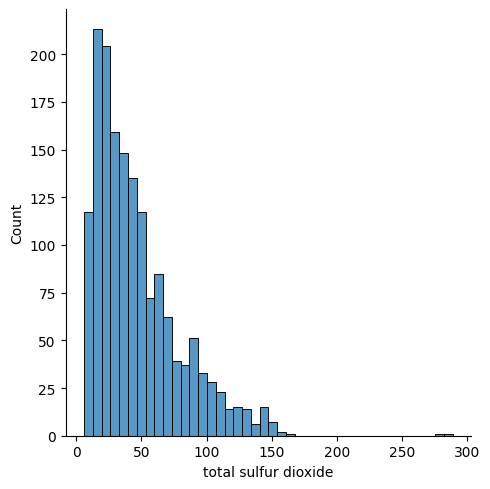

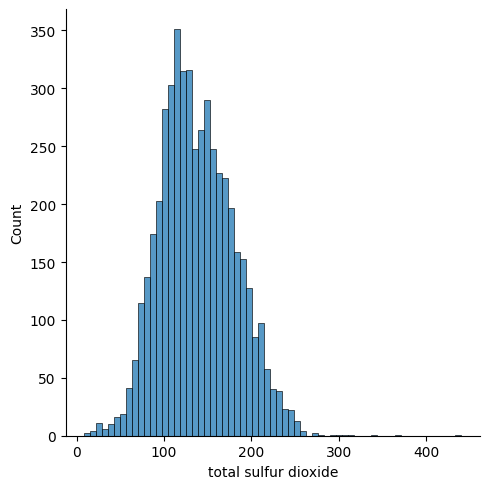

In [18]:
import seaborn as sns
for input_file in wine:
    sns.displot(wine[input_file]["total sulfur dioxide"], kde=False)

In [20]:
synthetic_wine = {}

for input_file in wine:
    
    synthetic_wine["syn_" + input_file] = pandas.DataFrame()
    
    sdev = wine[input_file].std(axis=0)
    mean = wine[input_file].mean(axis=0)
    # print(sdev)
    # print(mean)
    
    for _ in range(1):
        syn_data = pandas.DataFrame()
        for column in wine[input_file].columns:
            if column != "quality":
                print(column, mean[column], sdev[column])
                syn_data[column] = wine[input_file][column] * (1 + sdev[column] * random.uniform(-0.05, 0.05))
        synthetic_wine["syn_" + input_file].append(syn_data)
    
    print(input_file)
    print(synthetic_wine["syn_" + input_file].std(axis=0))
    print(wine[input_file].std(axis=0))
    
    

fixed acidity 8.31963727329581 1.7410963181276953
volatile acidity 0.5278205128205128 0.17905970415353537
citric acid 0.2709756097560976 0.19480113740531857
residual sugar 2.53880550343965 1.4099280595072798
chlorides 0.08746654158849279 0.0470653020100901
free sulfur dioxide 15.874921826141339 10.460156969809725
total sulfur dioxide 46.46779237023139 32.895324478299074
density 0.9967466791744841 0.0018873339538425554
pH 3.3111131957473416 0.15438646490354277
sulphates 0.6581488430268917 0.16950697959010996
alcohol 10.422983114446529 1.0656675818473946


AttributeError: 'DataFrame' object has no attribute 'append'